## Cascade Classifier from OpenCV

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the pre-trained cascade classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye_tree_eyeglasses.xml')

In [3]:
# Read the input image
img = cv2.imread('./faces library/Hermione.png')

# Convert to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [4]:
# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

# Draw rectangle around the faces on a copy of the original image
img_with_detections = img_rgb.copy()

# Loop over each detected face
for (x, y, w, h) in faces:
    # Draw rectangle around the face
    cv2.rectangle(img_with_detections, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Define face region of interest (ROI)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img_with_detections[y:y+h, x:x+w]

    # Detect eyes within the face ROI
    eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 3)

    # Draw rectangles around eyes
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)


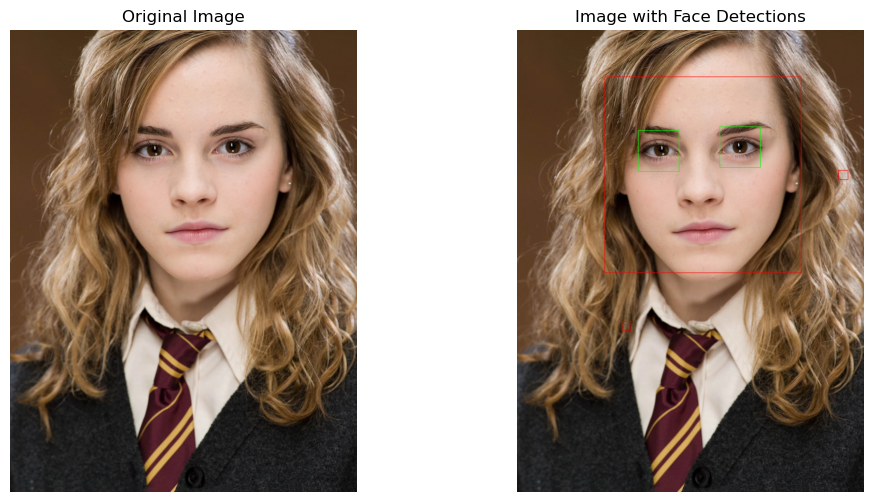

In [5]:
# Display the original and detected images using Matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_with_detections)
plt.title('Image with Face Detections')
plt.axis('off')

plt.show()

In [6]:
# Function to overlay a transparent image onto another image
def overlay_transparent(background, overlay, x, y):
    bg_height, bg_width = background.shape[:2]
    if x >= bg_width or y >= bg_height:
        return background

    h, w = overlay.shape[:2]
    if x + w > bg_width:
        w = bg_width - x
        overlay = overlay[:, :w]

    if y + h > bg_height:
        h = bg_height - y
        overlay = overlay[:h]

    if overlay.shape[2] < 4:
        overlay = np.concatenate([overlay, np.ones((overlay.shape[0], overlay.shape[1], 1), dtype=overlay.dtype) * 255], axis=2)

    overlay_img = overlay[..., :3]
    mask = overlay[..., 3:] / 255.0

    background[y:y+h, x:x+w] = (1.0 - mask) * background[y:y+h, x:x+w] + mask * overlay_img

    return background

In [7]:
# Put glasses sticker on the eyes
glasses = cv2.imread('./stickers library/glasses/round-eyeglasses.png', cv2.IMREAD_UNCHANGED)

# A copy of the original image
img_with_stickers = img_rgb.copy()

# For each face, detect the eyes
for (x, y, w, h) in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 3)

    # If 2 eyes are detected, place the glasses
    if len(eyes) == 2:
        eye_1 = eyes[0]
        eye_2 = eyes[1]

        # Calculate coordinates of the glasses
        glasses_width = abs(eye_1[0] - eye_2[0]) + eye_1[2] + eye_2[2]
        glasses_height = int(glasses_width * glasses.shape[0] / glasses.shape[1])

        # Resize the glasses sticker
        resized_glasses = cv2.resize(glasses, (glasses_width, glasses_height))

        # Find the position to place the glasses
        y1 = int(y + eye_1[1] - 0.25 * glasses_height) - 100
        y2 = y1 + glasses_height
        x1 = x + min(eye_1[0], eye_2[0]) - eye_1[2] + 120
        x2 = x1 + glasses_width

        # Overlay the glasses on the image
        img_with_stickers = overlay_transparent(img_with_stickers, resized_glasses, x1, y1)

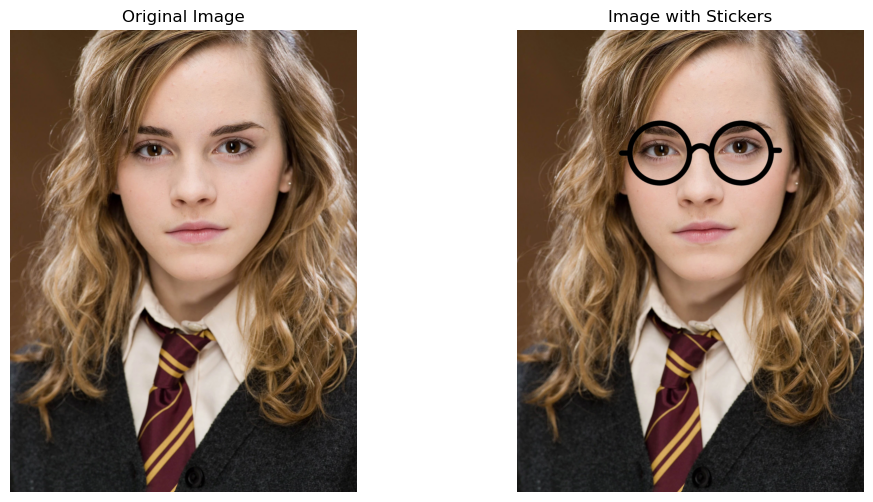

In [8]:
# Display the original and detected images using Matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_with_stickers)
plt.title('Image with Stickers')
plt.axis('off')

plt.show()